# Scripting a Workflow

In [ ]:
import napari_segment_blobs_and_things_with_membranes as nsbatwm
import numpy as np
import stackview
from bioio import BioImage
from napari_workflows import Workflow
from napari_workflows._io_yaml_v1 import load_workflow, save_workflow


In [ ]:
wf = Workflow()

wf.set('membrane-gb', nsbatwm.gaussian_blur, 'membrane', sigma=1)
wf.set('membrane-threshold', nsbatwm.threshold_otsu, 'membrane-gb')
wf.set('membrane-label', nsbatwm.label, 'membrane-threshold')

wf.set('nucleus-gb', nsbatwm.gaussian_blur, 'nucleus', sigma=1)
wf.set('nucleus-threshold', nsbatwm.threshold_otsu, 'nucleus-gb')
wf.set('nucleus-label', nsbatwm.label, 'nucleus-threshold')

save_workflow('cpu_workflow-2roots-2leafs.yaml', wf)


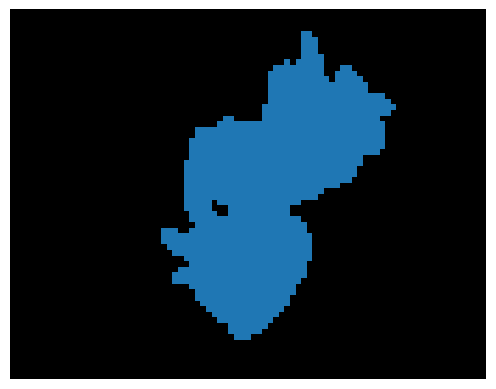

In [ ]:
wf = load_workflow('cpu_workflow-2roots-2leafs.yaml')

img = BioImage(r'images\cells3d2ch.tiff')
membrane = img.get_image_data('TCZYX', C=0)
membrane = np.squeeze(membrane)

nuclei = img.get_image_data('TCZYX', C=1)
nuclei = np.squeeze(nuclei)

wf.set('membrane', membrane)
wf.set('nucleus', nuclei)
membrane_label = wf.get('nucleus-label')

stackview.imshow(membrane_label)